In [42]:
import numpy as np
from pandas.io.parsers import read_csv

#/content/drive/MyDrive/AA/p4/data4.csv

valores=read_csv("data4.csv",header=None).to_numpy()

In [43]:
#seleccionar 80 filas aleatorias para entrenamiento de valores
np.random.shuffle(valores)
valores_ent = valores[:80, :]
valores_test = valores[80:100, :]
X = valores_ent[:, 0:2] #[fila[0:2] for fila in valores]
Y = valores_ent[:,2]

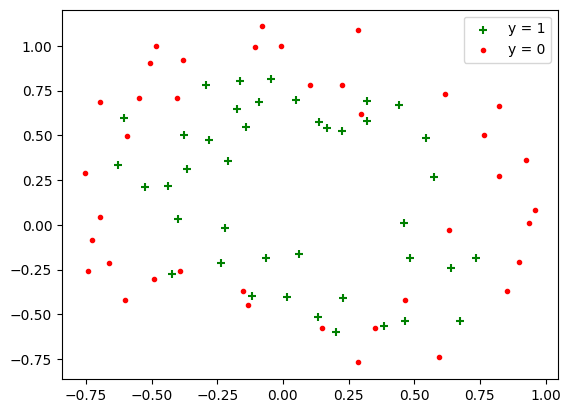

In [44]:
import matplotlib.pyplot as plt

pos = np.where(Y == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(Y == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

plt.legend()
plt.show()


In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6)
XX = poly.fit_transform(X)

In [46]:
def func_coste(y_hat, Y, L):
    Y_resd=Y-y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/(2*len(Y)) + L*np.sum(np.dot(w.T,w))/(2*len(Y))

def func_sigmoide(w,b,x):
    z = np.dot(x,w)+b
    return 1/(1+np.exp(-z))

def funcion_grad(X, y, w, b, L):
    y_hat = func_sigmoide(w,b,X)
    gb = (np.sum(y_hat-y))
    gw = np.dot((y_hat-y),X) + L/len(y)*w
    return gw, gb

def funcion_grad_desc(X, y, alpha, num_iter, L):
    w = np.zeros(X.shape[1])
    b = 0
    for i in range(num_iter):
        gw, gb = funcion_grad(X, y, w, b, L)
        w = w - alpha*gw
        b = b - alpha*gb
    return w, b

w, b = funcion_grad_desc(XX, Y, 0.001, 100000, 1)
w,b


(array([ 1.01886441,  1.07533365,  4.13006582, -6.12351373, -5.73794397,
        -5.46218045,  2.43375634, -1.85603922,  2.85029554, -1.1993351 ,
        -4.32363622,  0.03072895, -1.53265257, -0.32795954, -4.28967109,
        -0.62822779, -1.28114093,  2.56429142, -1.50329511, -0.97501938,
         0.16047702, -4.02809337, -0.8077562 , -0.17067883,  1.27424415,
        -1.74721297, -0.16381911, -2.60045941]),
 2.632575454074575)

In [47]:
def funcion_prediccion(w, b, X):
    y_hat = func_sigmoide(w,b,X)
    return y_hat


y_hat = funcion_prediccion(w, b, XX)
y_h = np.where(y_hat >= 0.5, 1, 0)

print("Accuracy: ", np.sum(y_h == Y)/len(Y))

Accuracy:  0.85


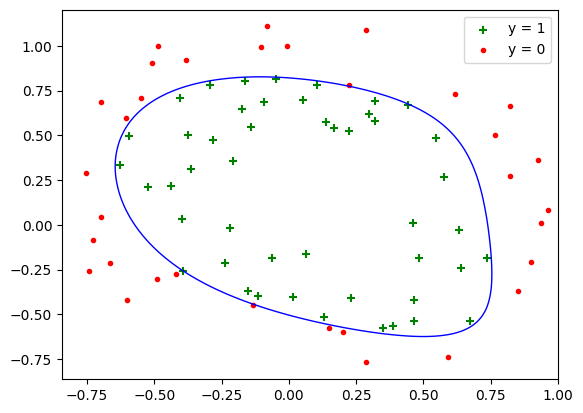

In [48]:
import matplotlib.pyplot as plt

pos = np.where(y_h == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(y_h == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

def non_linear_decision_boundary(w, b, X):
    x1 = np.linspace(-0.75, 1.0, 100)
    x2 = np.linspace(-0.75, 1.0, 100)
    x1, x2 = np.meshgrid(x1, x2)
    X = np.c_[x1.ravel(), x2.ravel()]
    XX = poly.fit_transform(X)
    y_hat = funcion_prediccion(w, b, XX)
    y_hat = y_hat.reshape(x1.shape)
    return x1, x2, y_hat

x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')

plt.legend()
plt.show()


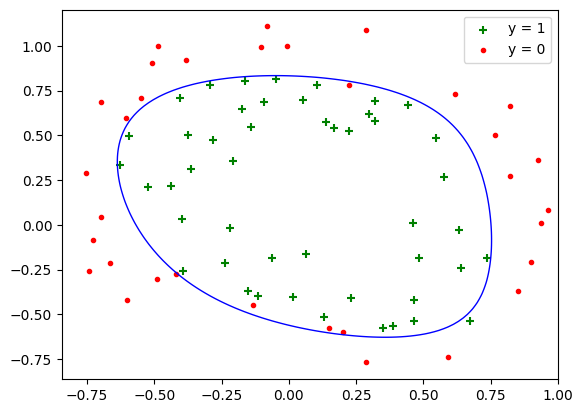

In [49]:
w,b = funcion_grad_desc(XX, Y, 0.001, 100000, 10)
y_hat = funcion_prediccion(w, b, XX)
pos = np.where(y_h == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(y_h == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')

plt.legend()
plt.show()


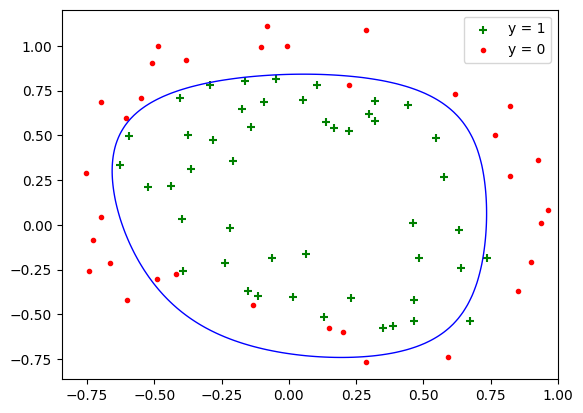

In [50]:
w,b = funcion_grad_desc(XX, Y, 0.001, 100000, 100)
y_hat = funcion_prediccion(w, b, XX)
pos = np.where(y_h == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(y_h == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')

plt.legend()
plt.show()

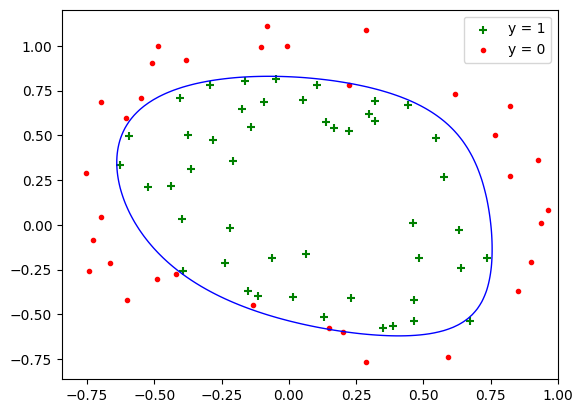

In [51]:
w,b = funcion_grad_desc(XX, Y, 0.001, 100000, 5)
y_hat = funcion_prediccion(w, b, XX)
pos = np.where(y_h == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(y_h == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')

plt.legend()
plt.show()

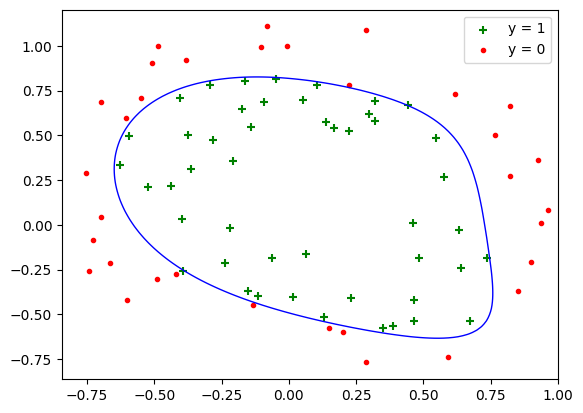

In [52]:
w,b = funcion_grad_desc(XX, Y, 0.001, 100000, 0)
y_hat = funcion_prediccion(w, b, XX)
pos = np.where(y_h == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(y_h == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')

plt.legend()
plt.show()